In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('housing.csv')

# Display the first few rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print(df.describe)

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

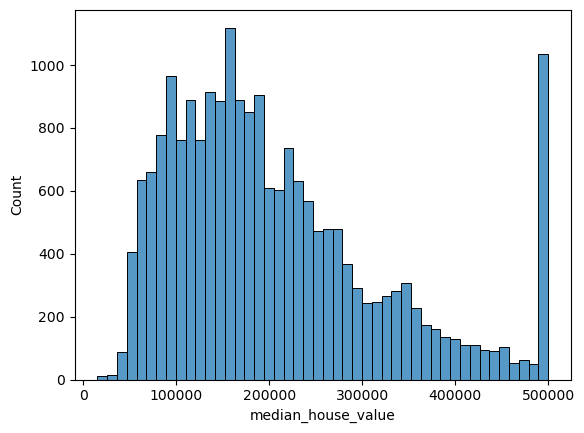

In [8]:
sns.histplot(df['median_house_value'])
plt.show()

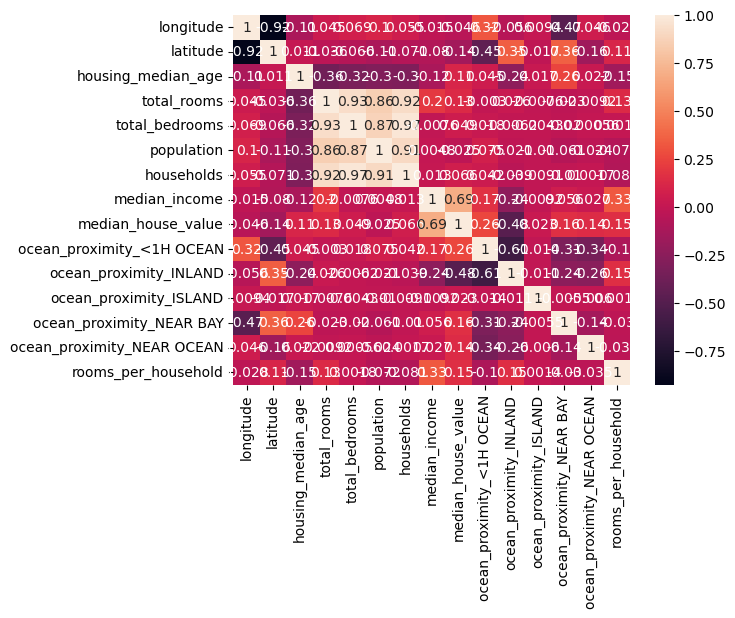

In [18]:
#Data cleaning 
# df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace = True)
# df = pd.get_dummies(df,columns =['ocean_proximity'])

df['rooms_per_household'] = df['total_rooms'] / df['households']

#correlation analysis
sns.heatmap(df.corr() , annot = True)
plt.show()

/var/folders/6w/f306m9xs7955x2wv8x6y7cp40000gp/T/ipykernel_27025/2957002209.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


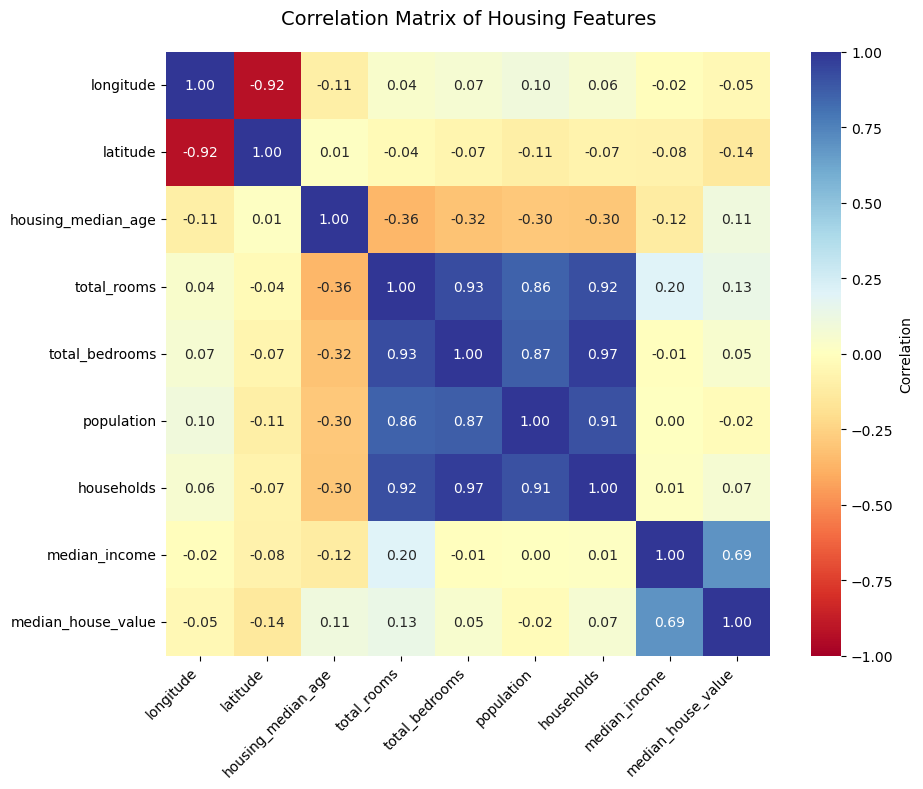

In [20]:

# Step 3: Select numeric columns (exclude ocean_proximity for correlation)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Step 4: Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Step 5: Create a clear heatmap
plt.figure(figsize=(10, 8))  # Set figure size for readability
sns.heatmap(
    corr_matrix,
    annot=True,  # Show correlation values in cells
    fmt=".2f",  # Format to 2 decimal places
    cmap='RdYlBu',  # Diverging colormap (red-yellow-blue)
    vmin=-1, vmax=1,  # Set correlation range
    center=0,  # Center the colormap at 0
    square=True,  # Make cells square for better visuals
    annot_kws={"size": 10},  # Set font size for annotations
    cbar_kws={"label": "Correlation"}  # Label the colorbar
)

# Step 6: Customize labels and title
plt.title('Correlation Matrix of Housing Features', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)

# Step 7: Adjust layout to prevent label cutoff
plt.tight_layout()

# Step 8: Save the heatmap
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Step 9: Display the plot
plt.show()